# Steady-State: Time-dependent (periodic) quantum system

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

Find the steady state of a driven qubit, by finding the eigenstates of the propagator for one driving period

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, destroy, expect, mesolve, propagator,
                   propagator_steadystate, sigmax, sigmaz, steadystate_floquet)

%matplotlib inline

In [2]:
def hamiltonian_t(t, args):
    #
    # evaluate the hamiltonian at time t.
    #
    H0 = args["H0"]
    H1 = args["H1"]
    w = args["w"]

    return H0 + H1 * np.sin(w * t)

In [3]:
def sd_qubit_integrate(delta, eps0, A, w, gamma1, gamma2, psi0, tlist):

    # Hamiltonian
    sx = sigmax()
    sz = sigmaz()
    sm = destroy(2)

    H0 = -delta / 2.0 * sx - eps0 / 2.0 * sz
    H1 = -A * sx

    H_args = {"H0": H0, "H1": H1, "w": w}
    # collapse operators
    c_op_list = []

    n_th = 0.5  # zero temperature

    # relaxation
    rate = gamma1 * (1 + n_th)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)

    # excitation
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())

    # dephasing
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)

    # evolve and calculate expectation values
    output = mesolve(hamiltonian_t, psi0, tlist,
                     c_op_list, [sm.dag() * sm], H_args)

    T = 2 * np.pi / w

    # Calculate steadystate using the propagator
    U = propagator(hamiltonian_t, T, c_op_list, H_args)
    rho_ss = propagator_steadystate(U)

    # Calculate steadystate using floquet formalism
    rho_ss_f = steadystate_floquet(H0, c_op_list, H1, w)

    return output.expect[0], expect(sm.dag() * sm, rho_ss), \
        expect(sm.dag() * sm, rho_ss_f)

In [4]:
delta = 0.3 * 2 * np.pi  # qubit sigma_x coefficient
eps0 = 1.0 * 2 * np.pi  # qubit sigma_z coefficient
A = 0.05 * 2 * np.pi  # driving amplitude (sigma_x coupled)
w = 1.0 * 2 * np.pi  # driving frequency

gamma1 = 0.15  # relaxation rate
gamma2 = 0.05  # dephasing  rate

# intial state
psi0 = basis(2, 0)
tlist = np.linspace(0, 50, 500)

In [5]:
p_ex, p_ex_ss, p_ex_ss_f = sd_qubit_integrate(delta,
                                              eps0,
                                              A,
                                              w,
                                              gamma1,
                                              gamma2,
                                              psi0,
                                              tlist)

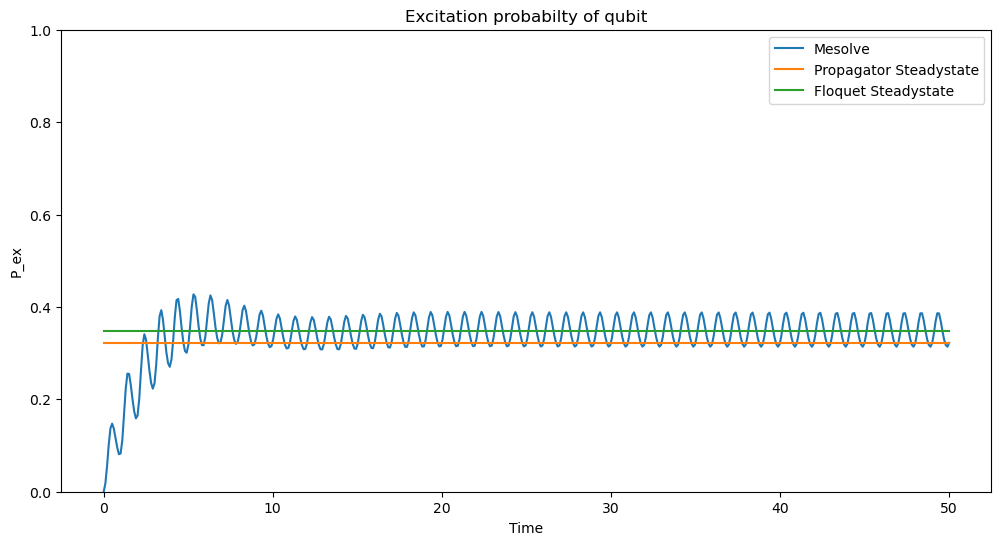

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(tlist, np.real(p_ex), label='Mesolve')
ax.plot(tlist, np.real(p_ex_ss) * np.ones(tlist.shape[0]),
        label='Propagator Steadystate')
ax.plot(tlist, np.real(p_ex_ss_f) * np.ones(tlist.shape[0]),
        label='Floquet Steadystate')
ax.set_xlabel("Time")
ax.set_ylabel("P_ex")
ax.set_ylim(0, 1)
ax.set_title("Excitation probabilty of qubit")
ax.legend();

## Software version:

In [7]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1.dev0+c8dd6de
Numpy Version:      1.22.4
Scipy Version:      1.8.1
Cython Version:     0.29.32
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     2
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/work/qutip-tutorials/qutip-tutorials/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can b